In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'D:\Machine learning\housing.csv')

In [4]:
# Rename 'MEDV' column to 'Price'
df.rename(columns={'MEDV': 'Price'}, inplace=True)

In [5]:
X = df.drop(columns='Price')
y = df['Price']

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.shape

(506, 14)

In [8]:
x =df.iloc[:,:-1]
y = df.iloc[:,-1]


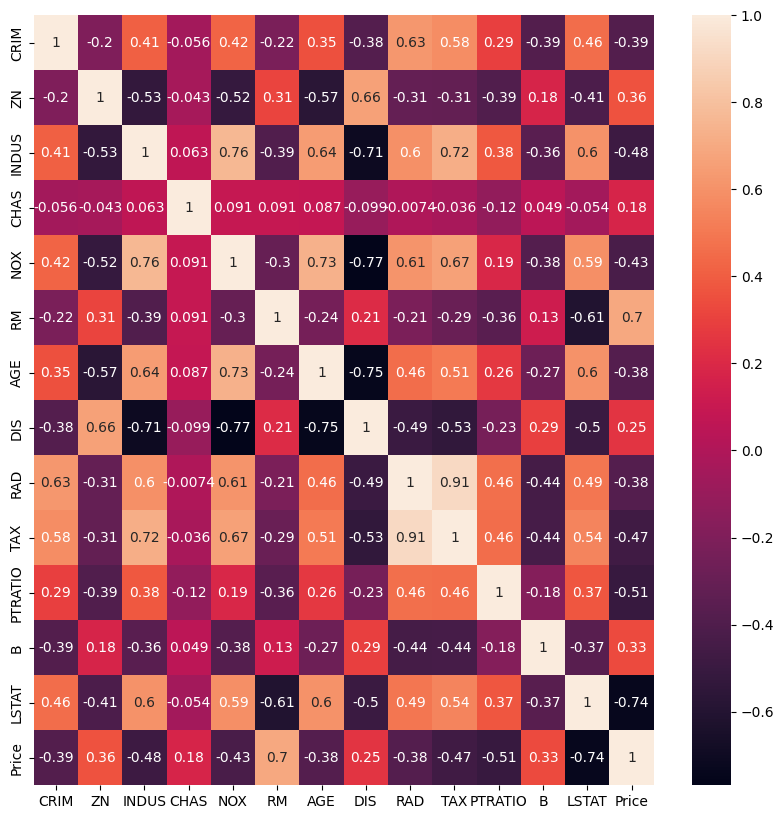

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.select_dtypes(include=[np.number]).corr(), annot=True)
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


# Linear Regression

In [13]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)*100

66.8759493535632

In [38]:
print(mean_squared_error(y_test, lr.predict(x_test)))
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

24.291119474973517
3.1890919658878483
4.928602182665336


In [14]:
lr.coef_

array([-0.97149423,  0.70155562,  0.27675212,  0.70653152, -1.99143043,
        3.11571836, -0.17706021, -3.04577065,  2.28278471, -1.79260468,
       -1.97995351,  1.12649864, -3.62814937])

In [15]:
lr.intercept_

np.float64(22.485268239316902)

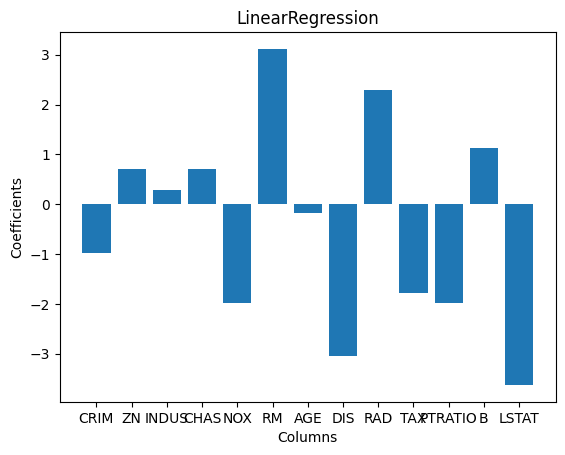

In [31]:
plt.Figure(figsize=(25,15))
plt.bar(x.columns, lr.coef_)
plt.title('LinearRegression')
plt.xlabel('Columns')
plt.ylabel('Coefficients')
plt.show()

# Lasso


In [25]:
la = Lasso(alpha=0.5)
la.fit(x_train, y_train)
la.score(x_test, y_test)*100

62.75319720814332

In [39]:
print(mean_squared_error(y_test, la.predict(x_test)))
print(mean_absolute_error(y_test, la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, la.predict(x_test))))

27.314489593533292
3.3059042506350544
5.22632658695697


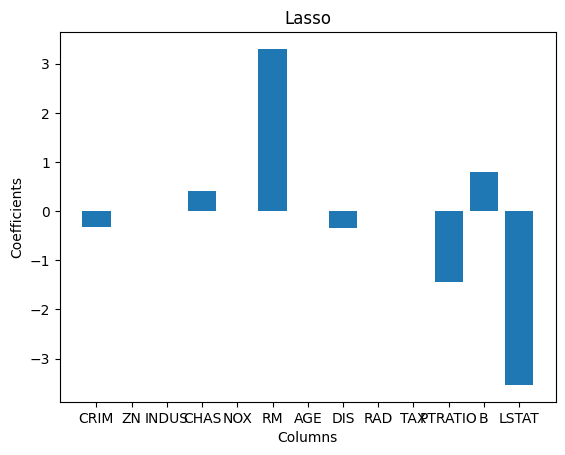

In [32]:
plt.Figure(figsize=(25,15))
plt.bar(x.columns, la.coef_)
plt.title('Lasso')
plt.xlabel('Columns')
plt.ylabel('Coefficients')
plt.show()


# Ridge

In [28]:
Ri = Ridge(alpha=0.5)
Ri.fit(x_train, y_train)
Ri.score(x_test, y_test)*100

66.859973141545

In [40]:
print(mean_squared_error(y_test, Ri.predict(x_test)))
print(mean_absolute_error(y_test, Ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, Ri.predict(x_test))))

24.302835435652188
3.187330305012138
4.929790607688342


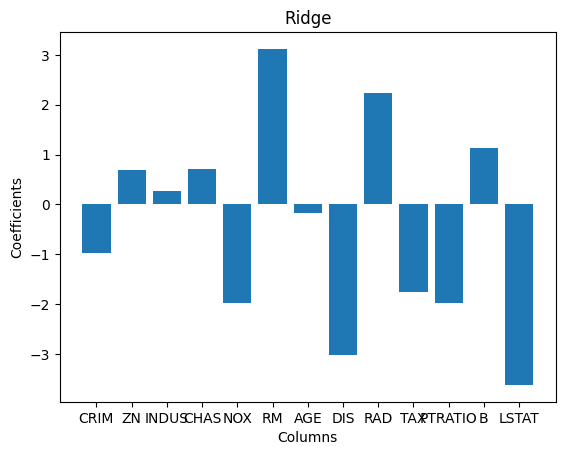

In [29]:
plt.Figure(figsize=(25,15))
plt.bar(x.columns, Ri.coef_)
plt.title('Ridge')
plt.xlabel('Columns')
plt.ylabel('Coefficients')
plt.show()

In [44]:
df1 = pd.DataFrame({'Columns': x.columns, 'LinearRegression': lr.coef_, 'Lasso': la.coef_, 'Ridge': Ri.coef_})

In [45]:
df1

,Columns,LinearRegression,Lasso,Ridge
0,CRIM,-0.971494,-0.317122,-0.966698
1,ZN,0.701556,0.000000,0.691904
2,INDUS,0.276752,-0.000000,0.263492
3,CHAS,0.706532,0.402419,0.708471
4,NOX,-1.991430,-0.000000,-1.976374
5,RM,3.115718,3.300461,3.119098
6,AGE,-0.177060,-0.000000,-0.177780
7,DIS,-3.045771,-0.338298,-3.027764
8,RAD,2.282785,-0.000000,2.241619
9,TAX,-1.792605,-0.000000,-1.754429
